In [34]:
import librosa 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import IPython.display as ipd

In [167]:
def get_indices(tokens):
    """ Separate tokens into audio and text tokens """
    audio = np.where(tokens < 0)[0]
    text = np.where(tokens > 0)[0]

    return audio, text

Load MuLlaMA tokens for example

In [168]:
# squeezing first two dimensions to make my life easier 
# [1, 1, tokens, output_features] -> [tokens, output_features]
mfs_tokens = np.load("extreme_case_analysis/mullama_few_shot_tokens.npy").squeeze(0).squeeze(0)
mfs_base = np.load("extreme_case_analysis/mullama_few_shot_base_values.npy").squeeze(0)
mfs_shapley = np.load("extreme_case_analysis/mullama_few_shot_shapley_values.npy").squeeze(0).squeeze(0)

mqo_tokens = np.load("extreme_case_analysis/mullama_question_only_tokens.npy").squeeze(0).squeeze(0)
mqo_base = np.load("extreme_case_analysis/mullama_question_only_base_values.npy").squeeze(0)
mqo_shapley = np.load("extreme_case_analysis/mullama_question_only_shapley_values.npy").squeeze(0).squeeze(0)

md_tokens = np.load("extreme_case_analysis/mullama_description_tokens.npy").squeeze(0).squeeze(0)
md_base = np.load("extreme_case_analysis/mullama_description_base_values.npy").squeeze(0)
md_shapley = np.load("extreme_case_analysis/mullama_description_shapley_values.npy").squeeze(0).squeeze(0)

In [11]:
qfs_tokens = np.load("extreme_case_analysis/few_shot_tokens.npy").squeeze(0).squeeze(0)
qfs_base = np.load("extreme_case_analysis/few_shot_base_values.npy").squeeze(0)
qfs_shapley = np.load("extreme_case_analysis/few_shot_shapley_values.npy").squeeze(0).squeeze(0)

In [9]:
mfs_audio_tidx, mfs_text_tidx = get_indices(mfs_tokens)
mqo_audio_tidx, mqo_text_tidx = get_indices(mqo_tokens)
md_audio_tidx, md_text_tidx = get_indices(md_tokens)

In [12]:
qfs_audio_tidx, qfs_text_tidx = get_indices(qfs_tokens)

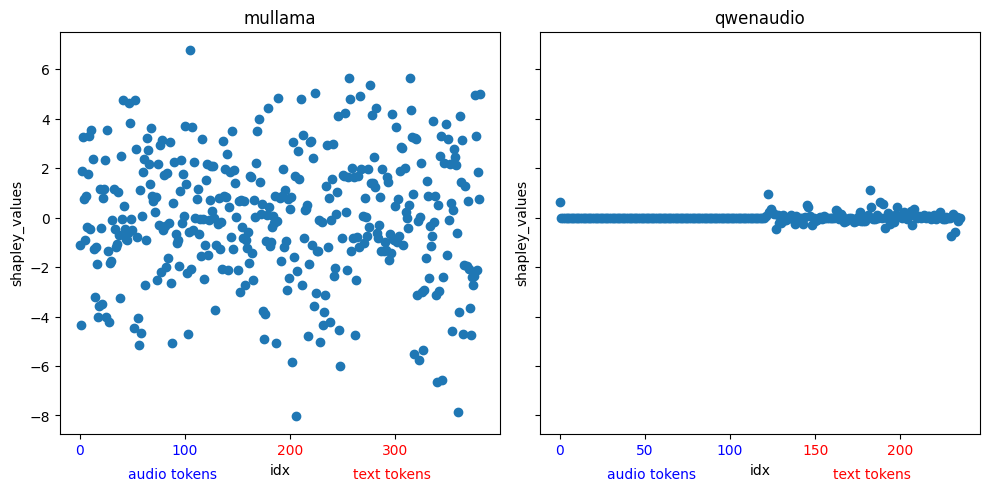

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot data
ax[0].scatter(np.arange(0, len(mfs_shapley[:, 0])), mfs_shapley[:, 0])
ax[1].scatter(np.arange(0, len(qfs_shapley[:, 0])), qfs_shapley[:, 0])

# Set labels and titles
ax[0].set_xlabel("idx")
ax[0].set_ylabel("shapley_values")
ax[0].set_title("mullama")

ax[1].set_xlabel("idx")
ax[1].set_ylabel("shapley_values")
ax[1].set_title("qwenaudio")

# Get current ticks (mullama)
ticks = ax[0].get_xticks()

# Define the split point (audio vs. text tokens)
split_idx = mfs_audio_tidx[-1]

# Only keep ticks within the data range
ticks = [t for t in ticks if 0 <= t <= len(mfs_shapley[:, 0])]

# Set ticks and color them conditionally
ax[0].set_xticks(ticks)
for tick in ax[0].get_xticklabels():
    if float(tick.get_text()) < split_idx:
        tick.set_color("blue")  
    else:
        tick.set_color("red")  

# Add a secondary label
ax[0].annotate('audio tokens', xy=(split_idx/2 / len(mu_fs_shapley[:, 0]), -0.1), 
           xycoords='axes fraction', ha='center', va='center', color='blue')
ax[0].annotate('text tokens', xy=((split_idx + len(mu_fs_shapley[:, 0])) / 2 / len(mu_fs_shapley[:, 0]), -0.1), 
           xycoords='axes fraction', ha='center', va='center', color='red')


# Get current ticks (qwenaudio)
ticks = ax[1].get_xticks()

# Define the split point (audio vs. text tokens)
split_idx = qfs_audio_tidx[-1]

# Only keep ticks within the data range
ticks = [t for t in ticks if 0 <= t <= len(qfs_shapley[:, 0])]

# Set ticks and color them conditionally
ax[1].set_xticks(ticks)
for tick in ax[1].get_xticklabels():
    if float(tick.get_text()) < split_idx:
        tick.set_color("blue")  
    else:
        tick.set_color("red")  

# # Optional: Add a secondary label
ax[1].annotate('audio tokens', xy=(split_idx/2 / len(qfs_shapley[:, 0]), -0.1), 
           xycoords='axes fraction', ha='center', va='center', color='blue')
ax[1].annotate('text tokens', xy=((split_idx + len(qfs_shapley[:, 0])) / 2 / len(qfs_shapley[:, 0]), -0.1), 
           xycoords='axes fraction', ha='center', va='center', color='red')

plt.tight_layout()

In [16]:
len(mfs_audio_tidx), len(qfs_audio_tidx)

(196, 121)

# Plot Shapley values over waveform

In [172]:
x, fs = librosa.load("experiments/input_data/t-CMJ6RsZzY_290.wav", sr=24000)

In [173]:
# get audio and text tokens for the three experiments
# few shot
mfs_audio_shapley = mfs_shapley[mfs_audio_tidx, :]
mfs_text_shapley = mfs_shapley[mfs_text_tidx, :]
print(f"few shot tokens. audio: {mfs_audio_shapley.shape}, text: {mfs_text_shapley.shape}")
# question only
mqo_audio_shapley = mqo_shapley[mqo_audio_tidx, :]
mqo_text_shapley = mqo_shapley[mqo_text_tidx, :]
print(f"question only tokens. audio: {mqo_audio_shapley.shape}, text: {mqo_text_shapley.shape}")
# description
md_audio_shapley = md_shapley[md_audio_tidx, :]
md_text_shapley = md_shapley[md_text_tidx, :]
print(f"description tokens. audio: {md_audio_shapley.shape}, text: {md_text_shapley.shape}")

few shot tokens. audio: (196, 9), text: (186, 9)
question only tokens. audio: (81, 17), text: (69, 17)
description tokens. audio: (64, 18), text: (64, 18)


## Average values

In [133]:
avg_mfs_audio_shapley = mfs_audio_shapley.mean(axis=1)
avg_mqo_audio_shapley = mqo_audio_shapley.mean(axis=1)
avg_md_audio_shapley = md_audio_shapley.mean(axis=1)

/tmp/ipykernel_59436/4154169261.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


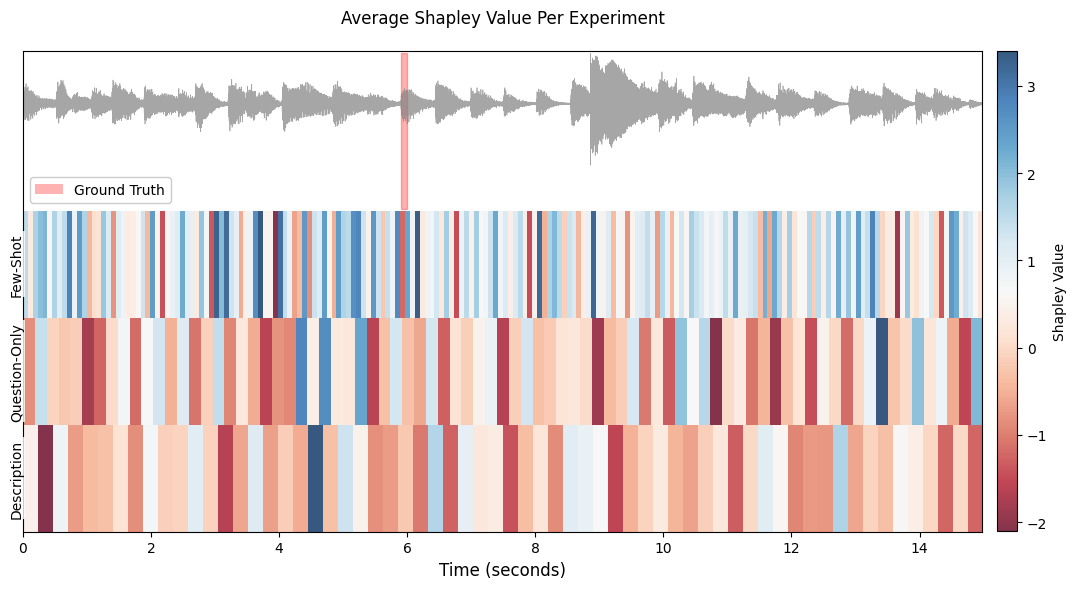

In [134]:
plt.figure(figsize=(10, 6))

# --- Audio parameters (adjust if needed) ---
sample_rate = 16000  # Hz (standard for audio)
total_duration = len(x) / sample_rate  # seconds

# --- 1. Plot the signal ---
signal_height = 0.5
signal_line, = plt.plot(np.linspace(0, total_duration, len(x)), x, 
                       color='gray', alpha=0.7, linewidth=0.5, label='Signal')

# --- 2. Heatmap settings ---
heatmap_height = 0.5
colormap = 'RdBu'
alpha = 0.8
spacing = 0.0

# --- 3. Plot heatmaps ---
shapley_data = {
    'Few-Shot': avg_mfs_audio_shapley,
    'Question-Only': avg_mqo_audio_shapley,
    'Description': avg_md_audio_shapley
}

y_pos = -signal_height
for i, (label, shapley_vals) in enumerate(shapley_data.items()):
    ymin = y_pos - heatmap_height
    ymax = y_pos
    
    # Calculate time positions for heatmap
    window_duration = total_duration / len(shapley_vals)
    heatmap_x = np.linspace(0, total_duration, len(shapley_vals))
    
    # Create heatmap
    plt.imshow(
        np.repeat(shapley_vals.reshape(1, -1), 20, axis=0),
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, ymin, ymax],
        alpha=alpha
    )
    
    # Add left-aligned label
    plt.text(-0.2, (ymin+ymax)/2, label, 
             ha='left', va='center', fontsize=10,
             rotation='vertical', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))
    
    y_pos = ymin - spacing

# --- 4. Ground truth line ---
# gt_time = 94352 / sample_rate  # Convert sample position to time
# plt.vlines(gt_time, ymin=y_pos, ymax=np.max(x), 
#            color="red", linestyle='--', linewidth=1, label="Ground Truth")

# --- 4.1 Ground truth rectangle ---
gt_start = 94352 / sample_rate
gt_end = gt_start + 0.1  

plt.axvspan(gt_start, gt_end, 
            ymin=0.67, 
            ymax=(np.max(x) - y_pos)/(np.max(x)*1.05 - y_pos),  # Normalized to plot height
            color='red', alpha=0.3, label='Ground Truth (1s)')

legend_elements = [
    mpl.patches.Patch(facecolor='red', alpha=0.3, label='Ground Truth')
]
plt.legend(handles=legend_elements, 
           loc='lower left',
           bbox_to_anchor=(0, 0.67),  # Positions above heatmaps
           framealpha=1)

# --- 5. Format axes ---
plt.xlabel('Time (seconds)', fontsize=12)
plt.title('Average Shapley Value Per Experiment', pad=20)
plt.ylim(y_pos, np.max(x)*1.05)
plt.yticks([])

# Colorbar with professional spacing
cax = plt.axes([1, 0.105, 0.02, 0.8])  # [left, bottom, width, height]
plt.colorbar(cax=cax, label='Shapley Value')

# Adjust margins to prevent label clipping
plt.subplots_adjust(right=0.9, left=0.1)
plt.tight_layout()
plt.show()

## Average of Absolute Shapley Values

In [149]:
abs_mfs_audio_shapley = np.abs(mfs_audio_shapley).sum(axis=1)
abs_mqo_audio_shapley = np.abs(mqo_audio_shapley).sum(axis=1)
abs_md_audio_shapley = np.abs(md_audio_shapley).sum(axis=1)

/tmp/ipykernel_59436/819787858.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


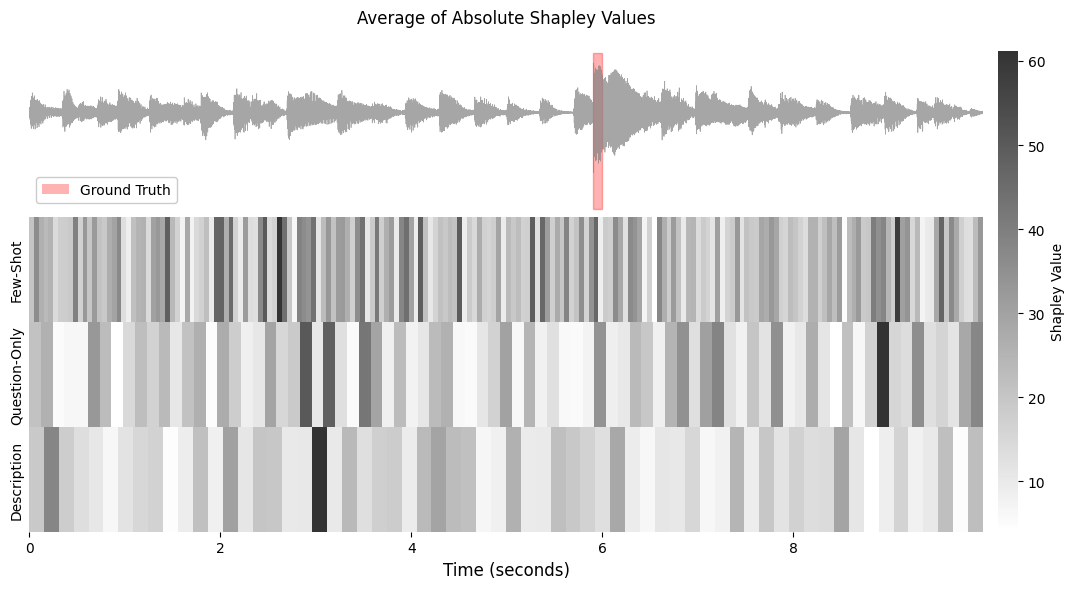

In [153]:
plt.figure(figsize=(10, 6))

# --- Audio parameters (adjust if needed) ---
sample_rate = 24000  # Hz (standard for audio)
total_duration = len(x) / sample_rate  # seconds

# --- 1. Plot the signal ---
signal_height = 0.5
signal_line, = plt.plot(np.linspace(0, total_duration, len(x)), x, 
                       color='gray', alpha=0.7, linewidth=0.5, label='Signal')

# --- 2. Heatmap settings ---
heatmap_height = 0.5
colormap = 'binary'
alpha = 0.8
spacing = 0.0

# --- 3. Plot heatmaps ---
shapley_data = {
    'Few-Shot': abs_mfs_audio_shapley,
    'Question-Only': abs_mqo_audio_shapley,
    'Description': abs_md_audio_shapley
}

y_pos = -signal_height
for i, (label, shapley_vals) in enumerate(shapley_data.items()):
    ymin = y_pos - heatmap_height
    ymax = y_pos
    
    # Calculate time positions for heatmap
    window_duration = total_duration / len(shapley_vals)
    heatmap_x = np.linspace(0, total_duration, len(shapley_vals))
    
    # Create heatmap
    plt.imshow(
        np.repeat(shapley_vals.reshape(1, -1), 20, axis=0),
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, ymin, ymax],
        alpha=alpha
    )
    
    # Add left-aligned label
    plt.text(-0.2, (ymin+ymax)/2, label, 
             ha='left', va='center', fontsize=10,
             rotation='vertical', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))
    
    y_pos = ymin - spacing

# --- 4.1 Ground truth rectangle ---
gt_start = 5.9 # in seconds
gt_end = gt_start + 0.1  # 100 ms window

plt.axvspan(gt_start, gt_end, 
            ymin=0.67, 
            ymax=(np.max(x) - y_pos)/(np.max(x)*1.05 - y_pos),  # Normalized to plot height
            color='red', alpha=0.3, label='Ground Truth (1s)')

legend_elements = [
    mpl.patches.Patch(facecolor='red', alpha=0.3, label='Ground Truth')
]
plt.legend(handles=legend_elements, 
           loc='lower left',
           bbox_to_anchor=(0, 0.67),  # Positions above heatmaps
           framealpha=1)

# --- 5. Format axes ---
plt.xlabel('Time (seconds)', fontsize=12)
plt.title('Average of Absolute Shapley Values', pad=20)
plt.ylim(y_pos, np.max(x)*1.05)
plt.yticks([])

# Remove ugly box
plt.box(False)
# Add top padding to center waveform
plt.ylim(y_pos, np.max(x) * 1.25) 

# Colorbar with professional spacing
cax = plt.axes([1, 0.105, 0.02, 0.8])  # [left, bottom, width, height]
plt.colorbar(cax=cax, label='Shapley Value')

# Adjust margins to prevent label clipping
plt.subplots_adjust(right=0.9, left=0.1)

# Remove ugly box
plt.box(False)

plt.tight_layout()
# plt.savefig("paper_figures/ashap_bell_example.png")
plt.show()

In [145]:
mfs_audio_contrib = np.abs(mfs_shapley[mfs_audio_tidx, :]).sum()
mfs_text_contrib = np.abs(mfs_shapley[mfs_text_tidx, :]).sum()
#ashap 
mfs_audio_contrib / (mfs_audio_contrib+mfs_text_contrib)

0.4850322706646966

In [146]:
mqo_audio_contrib = np.abs(mqo_shapley[mqo_audio_tidx, :]).sum()
mqo_text_contrib = np.abs(mqo_shapley[mqo_text_tidx, :]).sum()
#ashap 
mqo_audio_contrib / (mqo_audio_contrib+mqo_text_contrib)

0.5310929880872353

In [147]:
md_audio_contrib = np.abs(md_shapley[md_audio_tidx, :]).sum()
md_text_contrib = np.abs(md_shapley[md_text_tidx, :]).sum()
#ashap 
md_audio_contrib / (md_audio_contrib+md_text_contrib)

0.4729021329120029

# test

In [178]:
pos_mfs_audio_shapley = np.clip(mfs_audio_shapley, a_min=0, a_max=None).mean(axis=1)
pos_mqo_audio_shapley = np.clip(mqo_audio_shapley, a_min=0, a_max=None).mean(axis=1)
pos_md_audio_shapley = np.clip(md_audio_shapley, a_min=0, a_max=None).mean(axis=1)

/tmp/ipykernel_59436/17936605.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


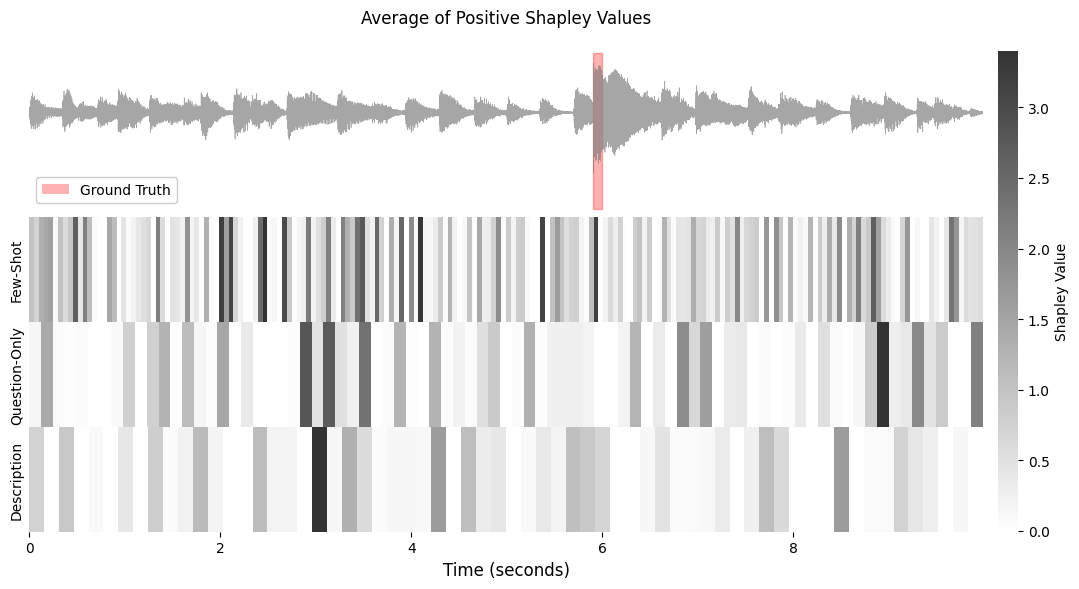

In [179]:
plt.figure(figsize=(10, 6))

# --- Audio parameters (adjust if needed) ---
sample_rate = 24000  # Hz (standard for audio)
total_duration = len(x) / sample_rate  # seconds

# --- 1. Plot the signal ---
signal_height = 0.5
signal_line, = plt.plot(np.linspace(0, total_duration, len(x)), x, 
                       color='gray', alpha=0.7, linewidth=0.5, label='Signal')

# --- 2. Heatmap settings ---
heatmap_height = 0.5
colormap = 'binary'
alpha = 0.8
spacing = 0.0

# --- 3. Plot heatmaps ---
shapley_data = {
    'Few-Shot': pos_mfs_audio_shapley,
    'Question-Only': pos_mqo_audio_shapley,
    'Description': pos_md_audio_shapley
}

y_pos = -signal_height
for i, (label, shapley_vals) in enumerate(shapley_data.items()):
    ymin = y_pos - heatmap_height
    ymax = y_pos
    
    # Calculate time positions for heatmap
    window_duration = total_duration / len(shapley_vals)
    heatmap_x = np.linspace(0, total_duration, len(shapley_vals))
    
    # Create heatmap
    plt.imshow(
        np.repeat(shapley_vals.reshape(1, -1), 20, axis=0),
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, ymin, ymax],
        alpha=alpha
    )
    
    # Add left-aligned label
    plt.text(-0.2, (ymin+ymax)/2, label, 
             ha='left', va='center', fontsize=10,
             rotation='vertical', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))
    
    y_pos = ymin - spacing

# --- 4.1 Ground truth rectangle ---
gt_start = 5.9 # in seconds
gt_end = gt_start + 0.1  # 100 ms window

plt.axvspan(gt_start, gt_end, 
            ymin=0.67, 
            ymax=(np.max(x) - y_pos)/(np.max(x)*1.05 - y_pos),  # Normalized to plot height
            color='red', alpha=0.3, label='Ground Truth (1s)')

legend_elements = [
    mpl.patches.Patch(facecolor='red', alpha=0.3, label='Ground Truth')
]
plt.legend(handles=legend_elements, 
           loc='lower left',
           bbox_to_anchor=(0, 0.67),  # Positions above heatmaps
           framealpha=1)

# --- 5. Format axes ---
plt.xlabel('Time (seconds)', fontsize=12)
plt.title('Average of Positive Shapley Values', pad=20)
plt.ylim(y_pos, np.max(x)*1.05)
plt.yticks([])

# Remove ugly box
plt.box(False)
# Add top padding to center waveform
plt.ylim(y_pos, np.max(x) * 1.25) 

# Colorbar with professional spacing
cax = plt.axes([1, 0.105, 0.02, 0.8])  # [left, bottom, width, height]
plt.colorbar(cax=cax, label='Shapley Value')

# Adjust margins to prevent label clipping
plt.subplots_adjust(right=0.9, left=0.1)

# Remove ugly box
plt.box(False)

plt.tight_layout()
# plt.savefig("paper_figures/ashap_bell_example.png")
plt.show()

In [188]:
# neg_mfs_audio_shapley = np.abs(np.clip(mfs_audio_shapley, a_min=None, a_max=0)).mean(axis=1)
# neg_mqo_audio_shapley = np.abs(np.clip(mqo_audio_shapley, a_min=None, a_max=0)).mean(axis=1)
# neg_md_audio_shapley = np.abs(np.clip(md_audio_shapley, a_min=None, a_max=0)).mean(axis=1)


neg_mfs_audio_shapley = np.clip(mfs_audio_shapley, a_min=None, a_max=0).mean(axis=1)
neg_mqo_audio_shapley = np.clip(mqo_audio_shapley, a_min=None, a_max=0).mean(axis=1)
neg_md_audio_shapley = np.clip(md_audio_shapley, a_min=None, a_max=0).mean(axis=1)

/tmp/ipykernel_59436/2360389822.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


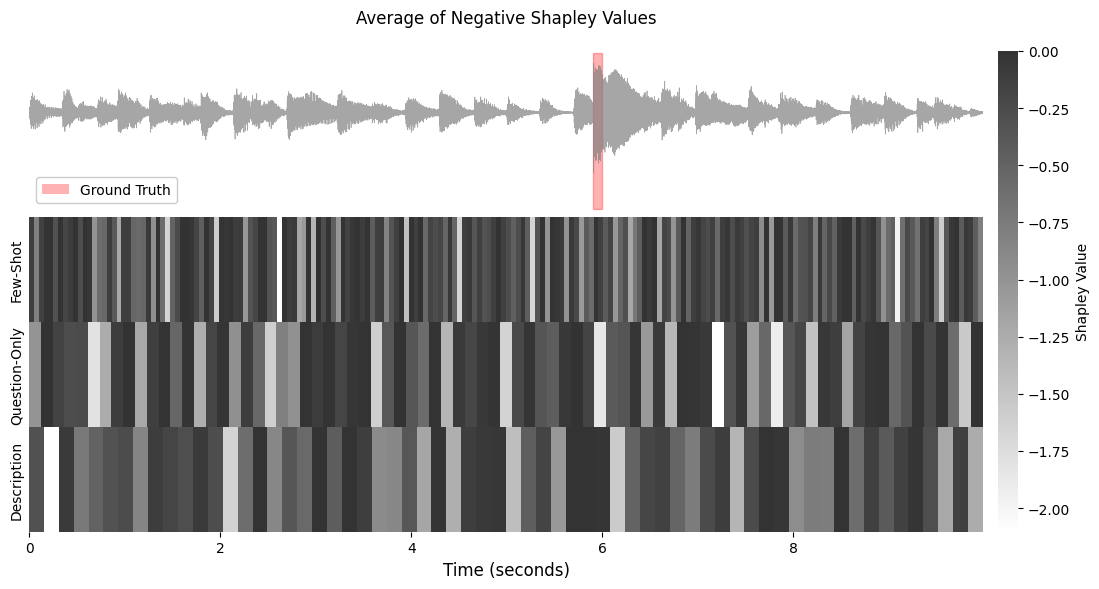

In [189]:
plt.figure(figsize=(10, 6))

# --- Audio parameters (adjust if needed) ---
sample_rate = 24000  # Hz (standard for audio)
total_duration = len(x) / sample_rate  # seconds

# --- 1. Plot the signal ---
signal_height = 0.5
signal_line, = plt.plot(np.linspace(0, total_duration, len(x)), x, 
                       color='gray', alpha=0.7, linewidth=0.5, label='Signal')

# --- 2. Heatmap settings ---
heatmap_height = 0.5
colormap = 'binary'
alpha = 0.8
spacing = 0.0

# --- 3. Plot heatmaps ---
shapley_data = {
    'Few-Shot': neg_mfs_audio_shapley,
    'Question-Only': neg_mqo_audio_shapley,
    'Description': neg_md_audio_shapley
}

y_pos = -signal_height
for i, (label, shapley_vals) in enumerate(shapley_data.items()):
    ymin = y_pos - heatmap_height
    ymax = y_pos
    
    # Calculate time positions for heatmap
    window_duration = total_duration / len(shapley_vals)
    heatmap_x = np.linspace(0, total_duration, len(shapley_vals))
    
    # Create heatmap
    plt.imshow(
        np.repeat(shapley_vals.reshape(1, -1), 20, axis=0),
        aspect='auto',
        cmap=colormap,
        extent=[0, total_duration, ymin, ymax],
        alpha=alpha
    )
    
    # Add left-aligned label
    plt.text(-0.2, (ymin+ymax)/2, label, 
             ha='left', va='center', fontsize=10,
             rotation='vertical', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))
    
    y_pos = ymin - spacing

# --- 4.1 Ground truth rectangle ---
gt_start = 5.9 # in seconds
gt_end = gt_start + 0.1  # 100 ms window

plt.axvspan(gt_start, gt_end, 
            ymin=0.67, 
            ymax=(np.max(x) - y_pos)/(np.max(x)*1.05 - y_pos),  # Normalized to plot height
            color='red', alpha=0.3, label='Ground Truth (1s)')

legend_elements = [
    mpl.patches.Patch(facecolor='red', alpha=0.3, label='Ground Truth')
]
plt.legend(handles=legend_elements, 
           loc='lower left',
           bbox_to_anchor=(0, 0.67),  # Positions above heatmaps
           framealpha=1)

# --- 5. Format axes ---
plt.xlabel('Time (seconds)', fontsize=12)
plt.title('Average of Negative Shapley Values', pad=20)
plt.ylim(y_pos, np.max(x)*1.05)
plt.yticks([])

# Remove ugly box
plt.box(False)
# Add top padding to center waveform
plt.ylim(y_pos, np.max(x) * 1.25) 

# Colorbar with professional spacing
cax = plt.axes([1, 0.105, 0.02, 0.8])  # [left, bottom, width, height]
plt.colorbar(cax=cax, label='Shapley Value')

# Adjust margins to prevent label clipping
plt.subplots_adjust(right=0.9, left=0.1)

# Remove ugly box
plt.box(False)

plt.tight_layout()
# plt.savefig("paper_figures/ashap_bell_example.png")
plt.show()